# Importing Data

In [1]:
import pandas as pd

In [2]:
housing_df = pd.read_csv('housing_coursework_entire_dataset_23-24.csv')
housing_df.head()

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY


# Data Preprocessing

In [3]:
# encoding categorical data, 'ocean_proximity'
from sklearn.preprocessing import LabelEncoder

column_name = 'ocean_proximity'
label_encoder = LabelEncoder()

# Fit and transform the categorical column
housing_df[column_name + '_encoded'] = label_encoder.fit_transform(housing_df[column_name])

housing_df.head()

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY,2
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY,2
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY,2
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY,2
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY,2


In [24]:
housing_df['median_house_value'].describe()

count      1000.000000
mean     207767.443000
std      113675.832278
min       14999.000000
25%      119900.000000
50%      184350.000000
75%      261950.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [4]:
housing_df.isna().sum()

No.                        0
longitude                  0
latitude                   0
housing_median_age         0
total_rooms                0
total_bedrooms             9
population                 0
households                 0
median_income              0
median_house_value         0
ocean_proximity            2
ocean_proximity_encoded    0
dtype: int64

# X and Y

In [5]:
x = housing_df.drop(columns = ['No.', 'median_house_value', 'ocean_proximity'])
y = housing_df['median_house_value']

x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded
0,-122.12,37.70,17,2488,617.0,1287,538,2.9922,2
1,-122.21,38.10,36,3018,557.0,1445,556,3.8029,2
2,-122.22,38.11,43,1939,353.0,968,392,3.1848,2
3,-122.20,37.78,52,2300,443.0,1225,423,3.5398,2
4,-122.19,37.79,50,954,217.0,546,201,2.6667,2
...,...,...,...,...,...,...,...,...,...
995,-119.30,36.30,14,3023,469.0,1523,492,5.3602,1
996,-121.70,38.65,22,1360,282.0,808,229,2.4167,1
997,-121.92,38.57,10,1320,246.0,898,228,1.9327,1
998,-122.00,38.83,26,272,49.0,194,52,3.4187,1


In [6]:
x.isna().sum()

longitude                  0
latitude                   0
housing_median_age         0
total_rooms                0
total_bedrooms             9
population                 0
households                 0
median_income              0
ocean_proximity_encoded    0
dtype: int64

# Splitting the Data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#imputation method is used to replace the NaN values with mean in this case
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Use StandardScaler to transform the combined arrays
x_train_scaler = scaler.fit_transform(x_train_imputed)
x_test_scaler = scaler.transform(x_test_imputed)

# Model Evaluation

In [20]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train_scaler, y_train)

RandomForestRegressor()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import math

y_pred_train = rfr.predict(x_train_scaler)

rfr_mse_train = np.round(mean_squared_error(y_train, y_pred_train), 2)
rfr_rmse_train = np.round(math.sqrt(rfr_mse_train), 2)
rfr_mae_train = np.round(mean_absolute_error(y_train, y_pred_train), 2)
rfr_r2_train = np.round(r2_score(y_train, y_pred_train), 2)

print("MSE:", rfr_mse_train)
print("RMSE:", rfr_rmse_train)
print("MAE:", rfr_mae_train)
print("R2:", rfr_r2_train)

MSE: 612435926.91
RMSE: 24747.44
MAE: 16761.61
R2: 0.95


In [22]:
y_pred_test = rfr.predict(x_test_scaler)

rfr_mse_test = np.round(mean_squared_error(y_test, y_pred_test), 2)
rfr_rmse_test = np.round(math.sqrt(rfr_mse_test), 2)
rfr_mae_test = np.round(mean_absolute_error(y_test, y_pred_test), 2)
rfr_r2_test = np.round(r2_score(y_test, y_pred_test), 2)

print("MSE:", rfr_mse_test)
print("RMSE:", rfr_rmse_test)
print("MAE:", rfr_mae_test)
print("R2:", rfr_r2_test)

MSE: 3586039859.88
RMSE: 59883.55
MAE: 44714.09
R2: 0.69


# Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [250, 500, 1000],
    'max_depth': [16, 18, 22],          
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4]       
}

reg = RandomForestRegressor()
reg = GridSearchCV(reg, parameters, n_jobs = -1)

In [13]:
reg.fit(x_train_scaler, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [16, 18, 22],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [250, 500, 1000]})

In [25]:
reg_y_pred_train = reg.predict(x_train_scaler)

reg_mse_train = np.round(mean_squared_error(y_train, reg_y_pred_train), 2)
reg_rmse_train = np.round(math.sqrt(reg_mse_train), 2)
reg_mae_train = np.round(mean_absolute_error(y_train, reg_y_pred_train), 2)
reg_r2_train = np.round(r2_score(y_train, reg_y_pred_train), 2)

print("MSE:", reg_mse_train)
print("RMSE:", reg_rmse_train)
print("MAE:", reg_mae_train)
print("R2:", reg_r2_train)

MSE: 926210920.61
RMSE: 30433.71
MAE: 19754.37
R2: 0.93


In [26]:
reg_y_pred_test = reg.predict(x_test_scaler)

reg_mse_test = np.round(mean_squared_error(y_test, reg_y_pred_test), 2)
reg_rmse_test = np.round(math.sqrt(reg_mse_test), 2)
reg_mae_test = np.round(mean_absolute_error(y_test, reg_y_pred_test), 2)
reg_r2_test = np.round(r2_score(y_test, reg_y_pred_test), 2)

print("MSE:", reg_mse_test)
print("RMSE:", reg_rmse_test)
print("MAE:", reg_mae_test)
print("R2:", reg_r2_test)

MSE: 3558601579.03
RMSE: 59654.02
MAE: 43977.25
R2: 0.69


In [19]:
reg.best_params_

{'max_depth': 16,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

# Plotting the Result

Text(0.5, 1.0, 'Actual vs Predicted')

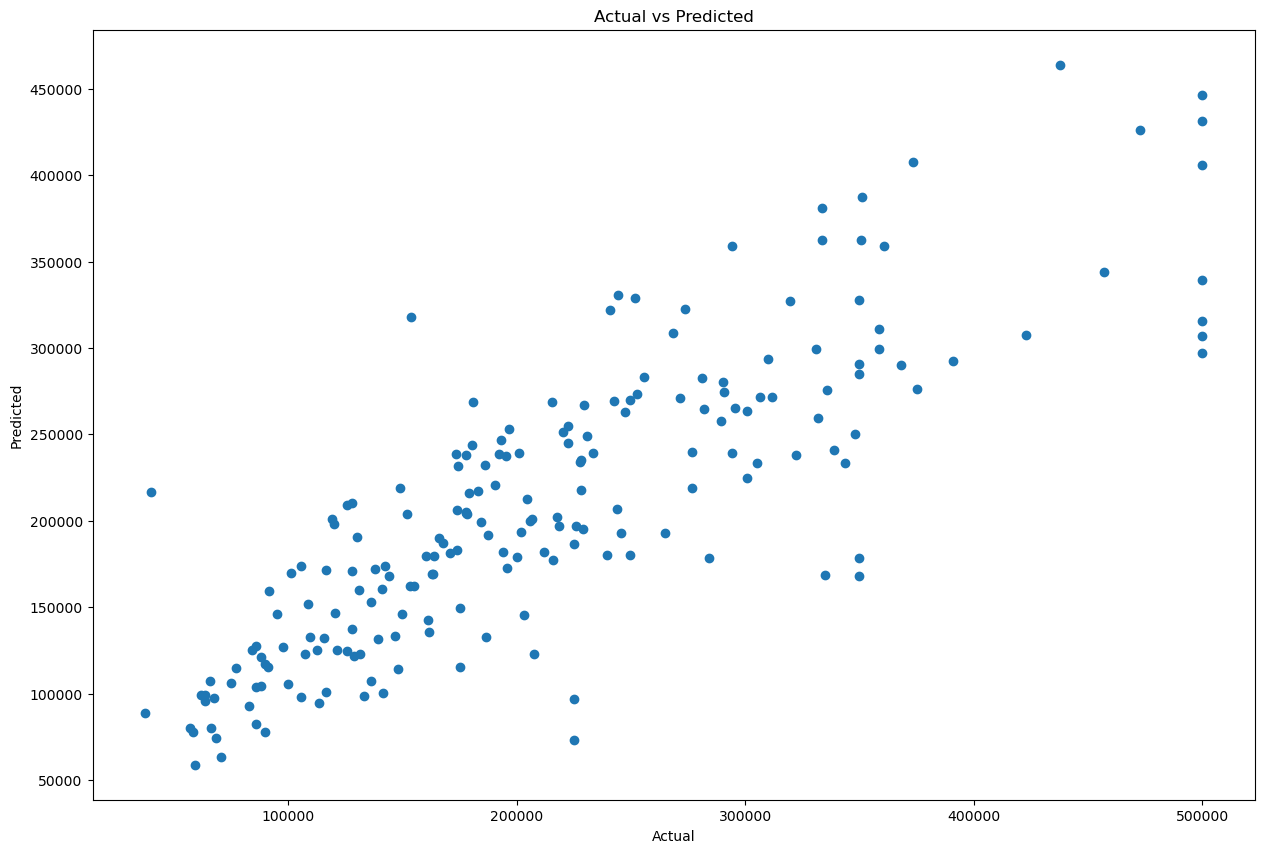

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('Actual vs Predicted')